In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

In [6]:
df=pd.read_csv('stud.csv')  # Replace with your actual data file

In [7]:
df.head()  # Display the first few rows of the dataset

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [9]:
X= df.drop(columns=['math_score'], axis=1)  # Replace 'target' with your actual target column name
y = df['math_score']  # Replace 'target' with your actual target column name

In [10]:
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

In [12]:
num_cols = X.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X.select_dtypes(include=['object']).columns
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
num_transformer = StandardScaler()
cat_transformer = OneHotEncoder(handle_unknown='ignore')

In [13]:
preprocessor = ColumnTransformer(
    [
        ('num', num_transformer, num_cols),
        ('cat', cat_transformer, cat_cols),
    ]
)

In [14]:
X=preprocessor.fit_transform(X)

In [15]:
X

array([[ 0.19399858,  0.39149181,  1.        , ...,  1.        ,
         0.        ,  1.        ],
       [ 1.42747598,  1.31326868,  1.        , ...,  1.        ,
         1.        ,  0.        ],
       [ 1.77010859,  1.64247471,  1.        , ...,  1.        ,
         0.        ,  1.        ],
       ...,
       [ 0.12547206, -0.20107904,  1.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.60515772,  0.58901542,  1.        , ...,  1.        ,
         1.        ,  0.        ],
       [ 1.15336989,  1.18158627,  1.        , ...,  0.        ,
         0.        ,  1.        ]], shape=(1000, 19))

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 19), (200, 19), (800,), (200,))

In [18]:
def evaluate_model(true,predicted):
    mae=mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    r2 = r2_score(true, predicted)
    print(f'Mean Absolute Error: {mae}')
    print(f'Mean Squared Error: {mse}')
    print(f'R^2 Score: {r2}')
    return mse, r2,mae

In [ ]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),    
    'Random Forest': RandomForestRegressor(),
    'XGBoost': XGBRegressor(),
    'Support Vector Regression': SVR(),
    'Decision Tree': DecisionTreeRegressor(),
    'K-Nearest Neighbors': KNeighborsRegressor(),
    'Gradient Boosting': GradientBoostingRegressor()
}

In [ ]:
model_list=[]
r2_list=[]

for i in range(len(models)):
    model_name = list(models.values())[i]

    model_name.fit(X_train, y_train)
    y_train_pred = model_name.predict(X_train)
    y_pred = model_name.predict(X_test)
    mse, r2, mae = evaluate_model(y_test, y_pred)
    print(f"{model_name} - MSE: {mse}, R^2: {r2}, MAE: {mae}")
    model_list.append(model_name)
    r2_list.append(r2)
    # mse_list.append(mse)
    print(f"{model_name} - MAE: {mae}")
    print(f"{model_name} - MSE: {mse}")
    print(f"{model_name} - R^2: {r2}")
    print("\n" + "="*50 + "\n") 
    print(f"{model_name} - MAE: {mae}")
    print(f"{model_name} - MSE: {mse}")
    print(f"{model_name} - R^2: {r2}")
    print("\n" + "="*50 + "\n")
    

Mean Absolute Error: 4.214763142474849
Mean Squared Error: 29.095169866715466
R^2 Score: 0.8804332983749565
LinearRegression() - MSE: 29.095169866715466, R^2: 0.8804332983749565, MAE: 4.214763142474849
LinearRegression() - MAE: 4.214763142474849
LinearRegression() - MSE: 29.095169866715466
LinearRegression() - R^2: 0.8804332983749565


LinearRegression() - MAE: 4.214763142474849
LinearRegression() - MSE: 29.095169866715466
LinearRegression() - R^2: 0.8804332983749565


Mean Absolute Error: 4.211100688014259
Mean Squared Error: 29.05627219234827
R^2 Score: 0.880593148502874
Ridge() - MSE: 29.05627219234827, R^2: 0.880593148502874, MAE: 4.211100688014259
Ridge() - MAE: 4.211100688014259
Ridge() - MSE: 29.05627219234827
Ridge() - R^2: 0.880593148502874


Ridge() - MAE: 4.211100688014259
Ridge() - MSE: 29.05627219234827
Ridge() - R^2: 0.880593148502874


Mean Absolute Error: 5.157879138921816
Mean Squared Error: 42.50633235127344
R^2 Score: 0.825320079562973
Lasso() - MSE: 42.5063323512734

In [26]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model', 'R^2']).sort_values(by='R^2', ascending=False)

,Model,R^2
1,Ridge(),0.880593
0,LinearRegression(),0.880433
8,([DecisionTreeRegressor(criterion='friedman_ms...,0.872178
3,"(DecisionTreeRegressor(max_features=1.0, rando...",0.853985
2,Lasso(),0.825320
4,"XGBRegressor(base_score=None, booster=None, ca...",0.821221
7,KNeighborsRegressor(),0.783770
6,DecisionTreeRegressor(),0.743752
5,SVR(),0.728600


In [27]:
LinearRegression= LinearRegression()
LinearRegression.fit(X_train, y_train)
y_train_pred = LinearRegression.predict(X_train)
y_pred = LinearRegression.predict(X_test)
evaluate_model(y_test, y_pred)

Mean Absolute Error: 4.214763142474849
Mean Squared Error: 29.095169866715466
R^2 Score: 0.8804332983749565


(29.095169866715466, 0.8804332983749565, 4.214763142474849)

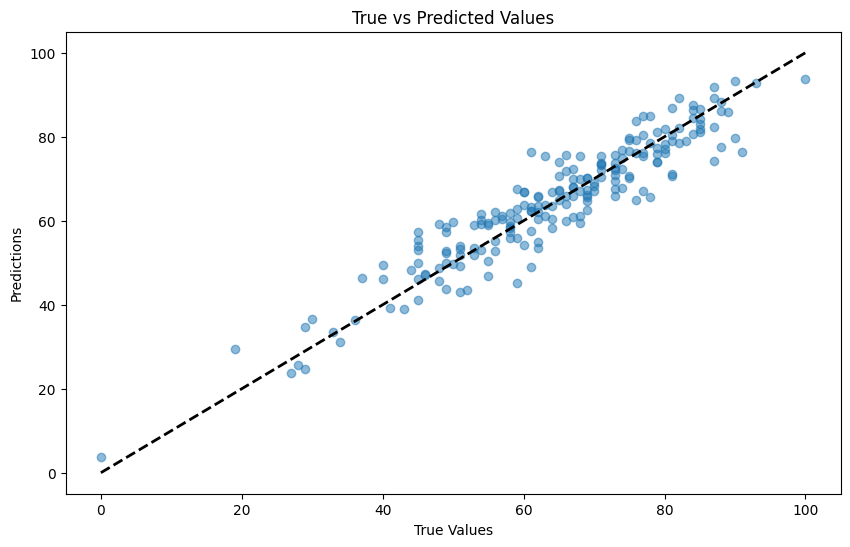

In [28]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True vs Predicted Values')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.show()

In [31]:
pred_diff=pd.DataFrame({'True Values': y_test, 'Predicted Values': y_pred, 'Difference': y_test - y_pred})
pred_diff

,True Values,Predicted Values,Difference
521,91,76.387970,14.612030
737,53,58.885970,-5.885970
740,80,76.990265,3.009735
660,74,76.851804,-2.851804
411,84,87.627378,-3.627378
...,...,...,...
408,52,43.409149,8.590851
332,62,62.152214,-0.152214
208,74,67.888395,6.111605
613,65,67.022287,-2.022287


In [32]:
pred_diff=pd.DataFrame({'True Values': y_test, 'Predicted Values': y_pred,'Difference': y_test - y_pred})
pred_diff

,True Values,Predicted Values,Difference
521,91,76.387970,14.612030
737,53,58.885970,-5.885970
740,80,76.990265,3.009735
660,74,76.851804,-2.851804
411,84,87.627378,-3.627378
...,...,...,...
408,52,43.409149,8.590851
332,62,62.152214,-0.152214
208,74,67.888395,6.111605
613,65,67.022287,-2.022287
